# Teoria do K-NN

## K-Nearest Neighbor

* É um dos mais simples algoritmos de classificação;
* Proposto por Fukunaga e Narendra em 1975;
* Método baseado em distância (Objetos relacionados ao mesmo conceito são semelhantes entre si);
* Rotula novos objetos com base nos exemplos do conjunto de treinamento mais próximos a ele;
* Pode ser utilizado tanto em classificação quanto em regressão.


## Funcionamento do KNN

* Recebe um dado não classificado;
* Mede a distância (Euclidiana, Manhattan, Minkowski ...) do novo dado com todos os outros dados que já estão classificados;
* Obtém as K menores distâncias;
* Verifica a classe de cada da um dos dados que tiveram a menor distância e conta a quantidade de cada classe que aparece;
* Toma como resultado a classe que mais apareceu dentre os dados que tiveram as menores distâncias e classifica o novo dado.


## Métricas de distância

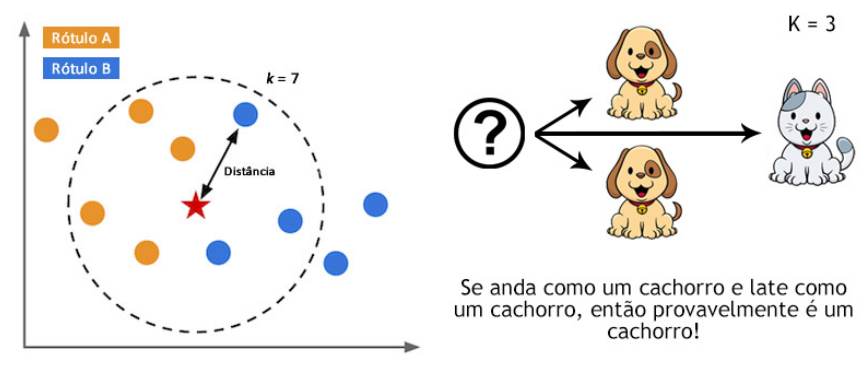

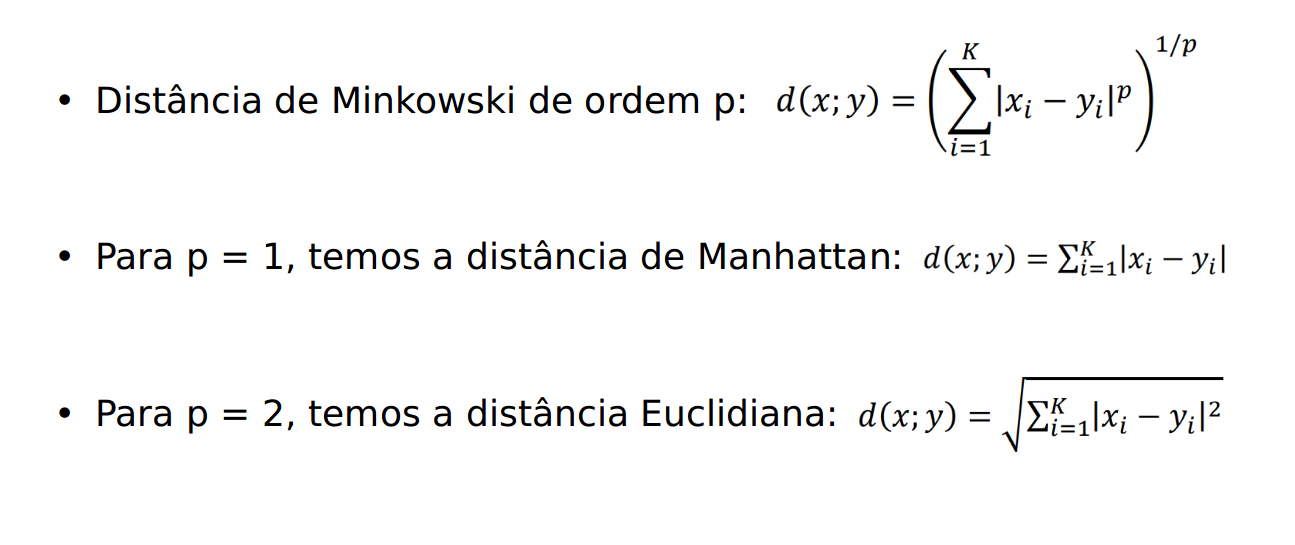

* Dados similares tendem a estar concentrados em uma mesma região do espaço de entradas e dados que não são similares estarão distantes entre si;
* Normaliza os dados para facilitar o cálculo (A escala pode enviesar o modelo);
* Quanto menor é o resultado da conta, maior é a similaridade entre os dois pontos calculados.
* A medida de distância mais utilizada é a Euclidiana:


## Valores de K

* Frequentemente usa k pequeno e ímpar (3, 5, ...). Valores pares não são usuais em classificação por poderem levar a empates.

**k muito pequeno:**

* Apenas objetos muito semelhantes serão considerados;

* Previsão pode ser instável;

* Sensível a outlier.

**K muito grande:**

* Vizinhos podem ser muito diferentes;

* Predição tendenciosa para classe majoritária;

* Custo computacional mais elevado.

* Mais resistente a outliers



## Vantagens do KNN

* Técnica simples e facilmente implementada;

* É aplicável mesmo em problemas complexos;

* Funciona facilmente em problemas de várias classes;

* É um algoritmo naturalmente incremental.

## Desvantagens do KNN

* Classificar um exemplo desconhecido pode ser um processo; computacionalmente complexo;

* Requer um calculo de distancia para cada exemplo de treinamento;

* Afetado pela presença de variáveis irrelevantes ou redundantes;

* Escolher o melhor K pode ser difícil.

# Prática do K-NN

## Importando Bibliotecas

In [2]:
#https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6

#Exploração de dados
import pandas as pd
import numpy as np

#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Lendo o Conjunto de Dados (Balance)

In [3]:
#https://archive.ics.uci.edu/ml/datasets/Balance+Scale
df = pd.read_csv('./assets/dataset/balance_scale.data', header = None, names = ['Classe','Peso Esquerdo','Distancia esquerda','Peso Direito','Distancia direita'])

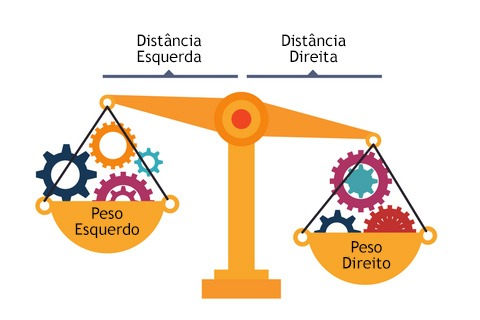

In [4]:
#df.sample para printar linhas aleatorias do conjunto de dados
df = df[['Peso Esquerdo','Distancia esquerda','Peso Direito','Distancia direita','Classe']]
df.sample(10)

,Peso Esquerdo,Distancia esquerda,Peso Direito,Distancia direita,Classe
556,5,3,2,2,L
376,4,1,1,2,L
87,1,4,3,3,R
150,2,2,1,1,L
506,5,1,2,2,L
104,1,5,1,5,B
530,5,2,2,1,L
60,1,3,3,1,B
550,5,3,1,1,L
357,3,5,2,3,L


In [5]:
#Printando a quantidade de cada classe
df.groupby(by='Classe').count()

,Peso Esquerdo,Distancia esquerda,Peso Direito,Distancia direita
Classe,,,,
B,49,49,49,49
L,288,288,288,288
R,288,288,288,288


## Normalizando os dados

In [6]:
#Importando o StandardScaler para normalizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = True , with_mean = True , with_std = True)

df_scaled = scaler.fit_transform(df.drop('Classe', axis = 1))
df_scaled

array([[-1.41421356, -1.41421356, -1.41421356, -1.41421356],
       [-1.41421356, -1.41421356, -1.41421356, -0.70710678],
       [-1.41421356, -1.41421356, -1.41421356,  0.        ],
       ...,
       [ 1.41421356,  1.41421356,  1.41421356,  0.        ],
       [ 1.41421356,  1.41421356,  1.41421356,  0.70710678],
       [ 1.41421356,  1.41421356,  1.41421356,  1.41421356]])

In [7]:
df_feat = pd.DataFrame(df_scaled, columns= df.columns[:-1])
df_feat.head()

,Peso Esquerdo,Distancia esquerda,Peso Direito,Distancia direita
0,-1.414214,-1.414214,-1.414214,-1.414214
1,-1.414214,-1.414214,-1.414214,-0.707107
2,-1.414214,-1.414214,-1.414214,0.000000
3,-1.414214,-1.414214,-1.414214,0.707107
4,-1.414214,-1.414214,-1.414214,1.414214


## Dividindo os dados em Treino e Teste

In [8]:
#Importando train_test_split para dividir os dados
from sklearn.model_selection import train_test_split

#Definindo X e Y
X = df_feat
y = df['Classe']

#Guardando os dados retornados pela train_test_split() em seus respectivos lugares
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

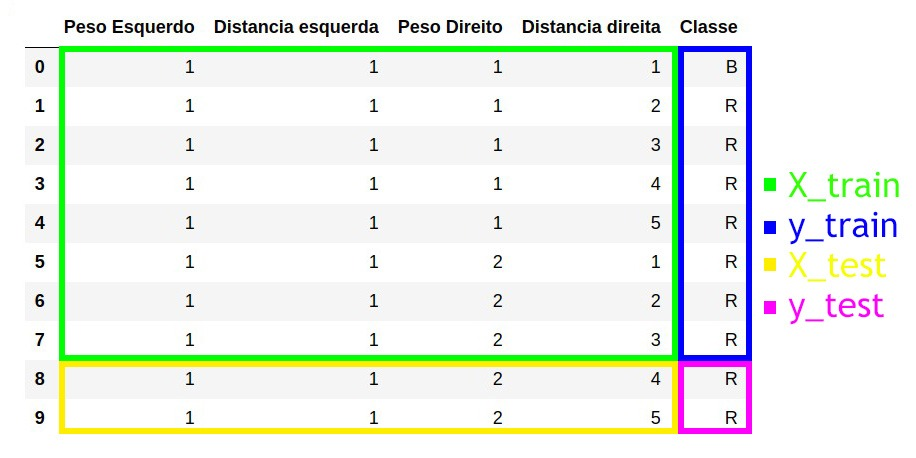

## Importando o KNN

In [9]:
#Importando o KNN da biblioteca do sklearn
from sklearn.neighbors import KNeighborsClassifier

#n_neighbors é a quantidade de K que vai ser utilizada
knn = KNeighborsClassifier(n_neighbors=5)

## Treinando o Modelo

In [10]:
#Passando os valores e resultados para treinar o modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Predizendo rótulos do conjunto de testes

In [11]:
#Fazendo previsoes com X_test
pred = knn.predict(X_test)

#Printando o resultado das previsoes
pred

array(['R', 'B', 'L', 'R', 'R', 'B', 'L', 'R', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'B', 'R', 'R', 'L',
       'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'B', 'B', 'L',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'B', 'R', 'L',
       'L', 'R', 'R', 'R', 'L', 'B', 'L', 'L', 'R', 'L', 'R', 'R', 'L',
       'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'B', 'L', 'R',
       'R', 'R', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R',
       'L', 'R', 'L', 'R', 'L', 'L', 'L', 'B'], dtype=object)

## Validando os resultados

In [12]:
#Importando relatorio da classificação e matriz de confusão para avaliar os resultados
from sklearn.metrics import classification_report, confusion_matrix

#Comparando os dados e printando os resultados
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           B       0.11      0.10      0.11        10
           L       0.81      0.95      0.87        55
           R       0.90      0.78      0.84        60

    accuracy                           0.80       125
   macro avg       0.61      0.61      0.61       125
weighted avg       0.80      0.80      0.80       125



### Matriz de confusão

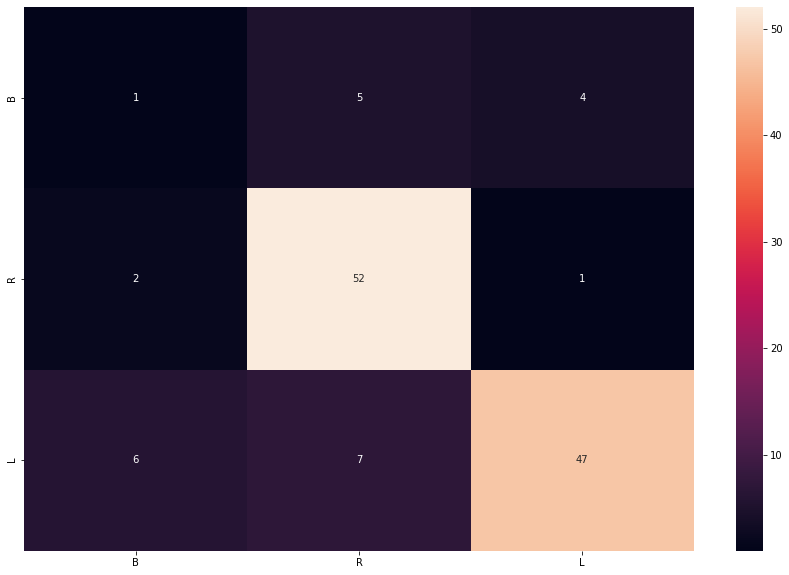

In [13]:
cmat = confusion_matrix(y_test, pred)
cmat = pd.DataFrame(cmat, index=["B", "R", "L"], columns=["B", "R", "L"])

plt.figure(figsize=(15, 10))
ax = sns.heatmap(cmat, annot=True)